# EX 1
Write a multivariate stable distribution generator for any given discrete spectral mea-
sure and parameter α. Consider only 2 dimensional case. Present your simulated
sample on scatterplot. Simulate the following cases

In [161]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as st
from basic_units import radians, degrees, cos

sns.set()
pi = np.pi

In [162]:
def stable_random_variables_a(alpha):
    if alpha == 1:
        Omega = np.random.uniform(-pi/2, pi/2)
        return np.tan(Omega)
    else:
        Omega = np.random.uniform(-pi/2, pi/2)
        W = np.random.exponential(1)
        return np.sin(alpha*Omega)/np.cos(Omega)**(1/alpha)*(np.cos((alpha-1)*Omega)/W)**((1-alpha)/alpha)
    
def stable_random_variables_b(alpha, beta):
    Omega = np.random.uniform(-pi/2, pi/2)
    W = np.random.exponential(1)
    Delta_0 = np.arctan(beta*np.tan(pi*alpha/2))/alpha

    if alpha == 1:
        return 2/pi*((pi/2+beta*Omega)*np.tan(Omega)-beta*np.log(pi/2*W*np.cos(Omega)/(pi/2+beta*Omega)))
    else:
        a = np.sin(alpha*(Delta_0+Omega))/(np.cos(alpha*Delta_0)*np.cos(Omega))**(1/alpha)
        b = (np.cos(alpha*Delta_0+(alpha-1)*Omega)/W)**((1-alpha)/alpha)
        return a*b

def stable_random_variables_0(alpha, beta, gamma, delta):
    Z = stable_random_variables_a(alpha, beta)
    if alpha == 1:
        return gamma*Z+delta
    else:
        return gamma*(Z - beta*np.tan(pi*alpha/2)) + delta


def stable_random_variables_1(alpha, beta, gamma, delta):
    Z = stable_random_variables_b(alpha, beta)
    if alpha == 1:
        return gamma*Z + (delta + beta*2/pi*gamma*np.log(gamma))
    else:
        return gamma*Z+delta
    
def stable_random_variables(alpha, beta, gamma=1, delta=0, stable_type = 1):
    if stable_type == 1:
        return stable_random_variables_1(alpha, beta, gamma, delta)
    elif stable_type ==0:
        return stable_random_variables_0(alpha, beta, gamma, delta)
    else:
        raise ValueError("Select bad stable_type!!!")

In [163]:
def sub_gaussian(alpha, sigma_matrix=[[1, 0], [0, 1]], mean_matrix = [0, 0], n = 1):
    beta = 1
    gamma = np.cos(pi*alpha/4)**(2/alpha)
    delta = 0
    G = np.random.default_rng().multivariate_normal(mean_matrix, sigma_matrix, n)
    
    sqrt_A = [[stable_random_variables(
        alpha/2, beta, gamma, delta)**(1/2)] for _ in range(n)]
    return sqrt_A * G


In [164]:
def multivariate_stable_distributions(alpha, array):
    n = array.shape[0]
    Z = [stable_random_variables(alpha= alpha, beta=1) for _ in range(n)]
    if alpha == 1:
        return np.sum(array[:,1:].T*array[:,0]**(1/alpha) * Z, axis=1)
    else:
        return np.sum(array[:,1:].T*array[:,0]**(1/alpha)*(Z+ 2/pi*np.log(array[:,0])),axis=1)

In [41]:
def sub_gaussian_SaS(alpha, sigma_matrix=[[1, 0], [0, 1]], mean_matrix = [0, 0], n = 1):
    beta = 1
    gamma = np.cos(pi*alpha/4)**(2/alpha)
    delta = 0
    G = np.random.default_rng().multivariate_normal(mean_matrix, sigma_matrix, n)
    
    sqrt_A = [[stable_random_variables(
        alpha/2, beta, gamma, delta)**(1/2)] for _ in range(n)]
    return sqrt_A * G

## a)

In [165]:
alpha = 0.9
arr1 = np.array([
    [0.25 ,  1  , 0],
    [0.125,  1/2, np.sqrt(3)/2],
    [0.25 , -1/2, np.sqrt(3)/2],
    [0.25 , -1  , 0],
    [0.125, -1/2, -np.sqrt(3)/2],
    [0.25 , 1/2 , -np.sqrt(3)/2],
])

In [166]:
X_1_a = np.array([multivariate_stable_distributions(alpha , arr1) for _ in range(20000)])

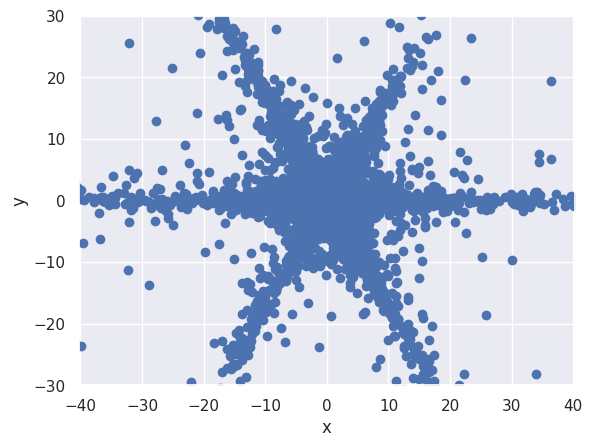

In [167]:
plt.scatter(X_1_a[:,0],X_1_a[:,1])
plt.axis('equal')
plt.xlim(-30,30)
plt.ylim(-30,30)
plt.xlabel("x")
plt.ylabel("y")
plt.savefig("latex/images/ex_1_a_alpha_stable_vector_simulation_symmetric_discreet_scatter.png")
plt.show()

In [168]:
maskX = X_1_a[np.sqrt(X_1_a[:, 0]**2 + X_1_a[:, 1]**2) < 10]
x = maskX[:, 0]
y = maskX[:, 1]
# Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY
print(xmin, xmax, ymin, ymax)
xx, yy = np.mgrid[xmin:xmax:150j, ymin:ymax:150j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

-11.989746449137412 11.974177689302865 -11.879085656236557 11.401297882026851


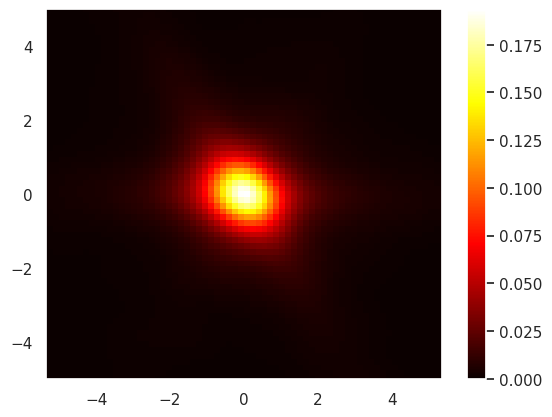

In [169]:
plt.pcolormesh(xx, yy, f, cmap='hot')
plt.colorbar()
plt.axis('equal')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.savefig("latex/images/ex_1_a_alpha_stable_vector_simulation_symmetric_discreet_heatmap.png")


## b)

In [170]:
def ex_1_b(alpha, beta, gamma, delta, sigma_matrix=[[1,0],[0,1]] , mean_matrix = [0,0], n =1 ):
    sqrt_A = [[stable_random_variables(alpha, beta, gamma, delta)] for _ in range(n)]
    G = np.random.default_rng().multivariate_normal(mean_matrix, sigma_matrix, n)
    return sqrt_A * G

In [42]:
alpha = 1.6
beta = 1
gamma = 1
delta = 0
# X_1_b = ex_1_b(alpha, beta, gamma, delta, sigma_matrix=[[1,0],[0,1]] , mean_matrix = [0,0], n = 20000 )
X_1_b  = sub_gaussian_SaS(alpha, sigma_matrix=[[1, 0], [0, 1]], n = 10000)

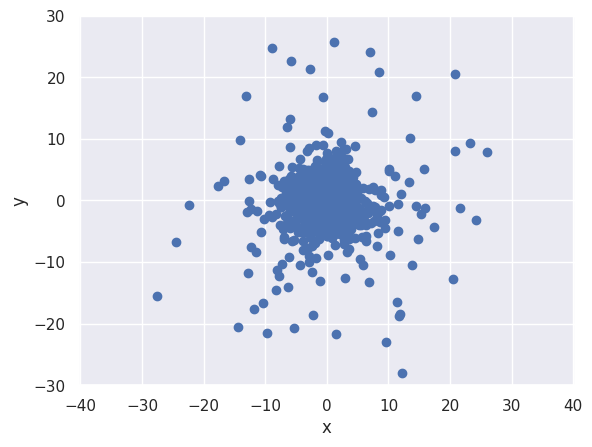

In [44]:
plt.scatter(X_1_b[:,0], X_1_b[:,1])
plt.axis('equal')
plt.xlim(-30,30)
plt.ylim(-30,30)
plt.xlabel("x")
plt.ylabel("y")
plt.savefig("latex/images/ex_1_b_alpha_stable_vector_simulation_symmetric_continous_scatter.png")
plt.show()

In [45]:
maskX = X_1_b[np.sqrt(X_1_b[:, 0]**2 + X_1_b[:, 1]**2) < 10]
x = maskX[:, 0]
y = maskX[:, 1]
# Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY
print(xmin, xmax, ymin, ymax)
xx, yy = np.mgrid[xmin:xmax:200j, ymin:ymax:200j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

-11.224904306903158 11.194742616126838 -11.273269726889447 11.373472896675128


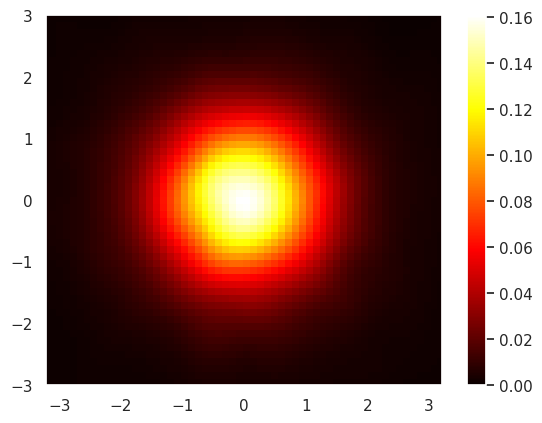

In [46]:
plt.pcolormesh(xx, yy, f, cmap='hot')
plt.colorbar()
plt.axis('equal')

plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.savefig("latex/images/ex_1_b_alpha_stable_vector_simulation_symmetric_discreet_heatmap.png")


## c)

In [50]:

alpha = 1.6
beta = 1
gamma = 1
delta = 0
# X_1_c = ex_1_b(alpha, beta, gamma, delta, sigma_matrix=[[1, 0.5],[0.5, 0.7]] , mean_matrix = [0,0], n = 20000 )
X_1_c  = sub_gaussian_SaS(alpha, sigma_matrix=[[1, 0.5],[0.5, 0.7]], n = 20000)

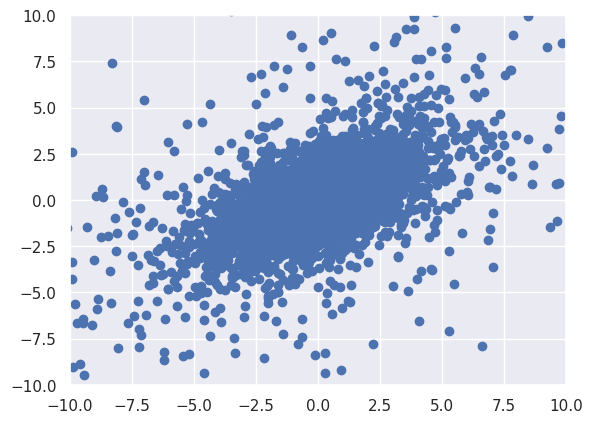

In [51]:
plt.scatter(X_1_c[:,0], X_1_c[:,1])
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.savefig("latex/images/ex_1_c_alpha_stable_vector_simulation_symmetric_discreet_scatter.png")
plt.show()

In [52]:
maskX = X_1_c[np.sqrt(X_1_c[:, 0]**2 + X_1_c[:, 1]**2) < 10]
x = maskX[:, 0]
y = maskX[:, 1]
# Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY
print(xmin, xmax, ymin, ymax)
xx, yy = np.mgrid[xmin:xmax:200j, ymin:ymax:200j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

-11.185209317258655 11.636009356267735 -11.248481605917007 11.138446929782083


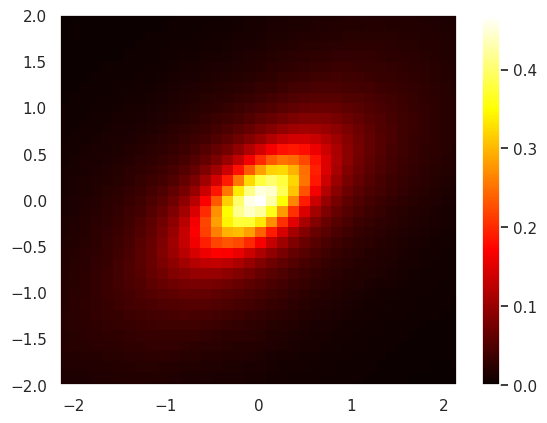

In [178]:
plt.pcolormesh(xx, yy, f, cmap='hot')
plt.colorbar()
plt.axis('equal')

plt.xlim(-2, 2)
plt.ylim(-2, 2)

plt.savefig("latex/images/ex_1_c_alpha_stable_vector_simulation_symmetric_discreet_heatmap.png")


# ex 2

In [53]:
def sub_gaussian_SaS(alpha, sigma_matrix=[[1, 0], [0, 1]], mean_matrix = [0, 0], n = 1):
    beta = 1
    gamma = np.cos(pi*alpha/4)**(2/alpha)
    delta = 0
    G = np.random.default_rng().multivariate_normal(mean_matrix, sigma_matrix, n)
    
    sqrt_A = [[stable_random_variables(
        alpha/2, beta, gamma, delta)**(1/2)] for _ in range(n)]
    return sqrt_A * G

In [54]:
alpha = 1.6
X_2  = sub_gaussian_SaS(alpha, sigma_matrix=[[1, 0], [0, 1]], n = 10000)

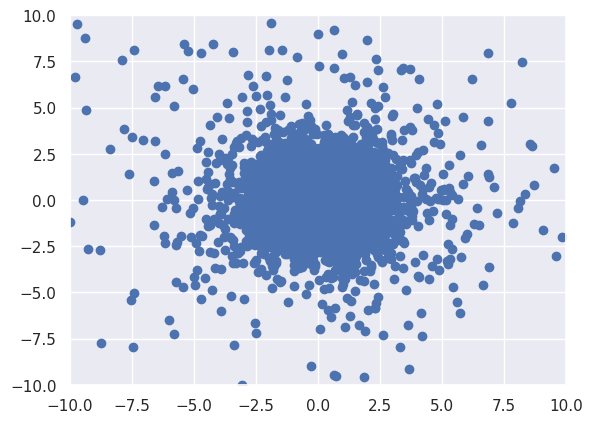

In [55]:
plt.scatter(X_2[:,0], X_2[:,1])
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.savefig("latex/images/ex_2_alpha_stable_vector_simulation_sub_gaussian_SaS_catter.png")
plt.show()

In [56]:
maskX = X_2[np.sqrt(X_2[:, 0]**2 + X_2[:, 1]**2) < 10]
x = maskX[:, 0]
y = maskX[:, 1]
# Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY
print(xmin, xmax, ymin, ymax)
xx, yy = np.mgrid[xmin:xmax:200j, ymin:ymax:200j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

-11.345731135830878 11.41778681581517 -11.512490439889952 11.466709366489038


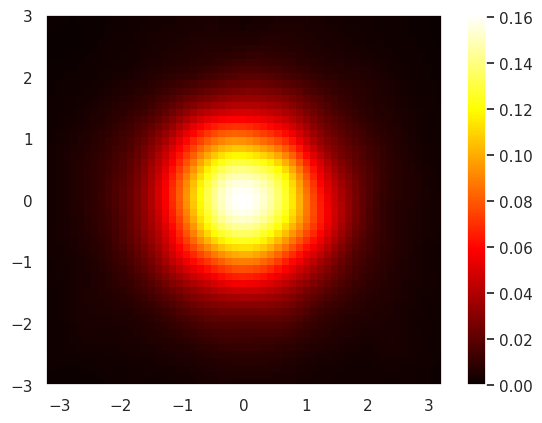

In [57]:
plt.pcolormesh(xx, yy, f, cmap='hot')
plt.colorbar()
plt.axis('equal')

plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.savefig("latex/images/ex_2_alpha_stable_vector_simulation_sub_gaussian_SaS_heatmap.png")
plt.show()

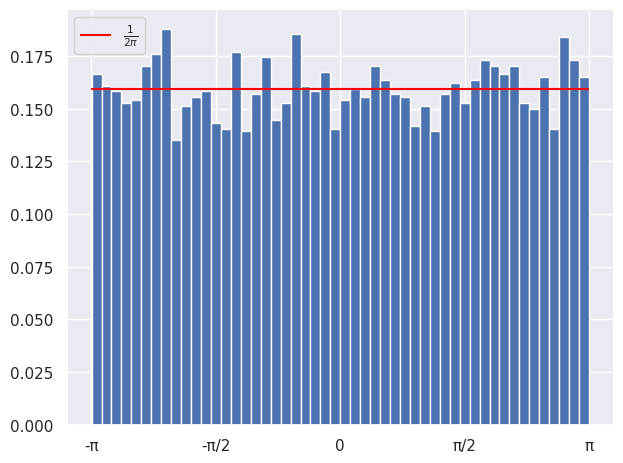

In [60]:
fig,ax=plt.subplots(1)
mask  = np.sqrt(np.sum(np.power(X_2, 2),1)) > 1
X_2_mask = X_2[ mask]

ax.hist(np.arctan2(X_2_mask[:,0], X_2_mask[:,1]) , xunits = radians, density= True, bins =50)
plt.xticks(np.arange(-pi, pi+pi/2, step=(pi/2)), ['-π','-π/2','0','π/2','π'])

fig.tight_layout()
plt.hlines(1/(2*pi) ,-pi, pi, colors= "red", label="$\\frac{1}{2\\pi}$")
plt.legend()
plt.savefig("latex/images/ex_2_spectral_measure.png")
plt.show()

In [61]:
xn = 100
yn = 100
lim = 3
xs = np.linspace(-lim, lim, xn)
ys = np.linspace(-lim, lim, yn)
ts_2d = np.array([ [x,y] for x in xs  for y in ys])
XY, Z = gen_ecf(X_2, ts_2d)
xx,yy = np.meshgrid(xs, ys)
f = np.reshape(Z, (xn, yn)).T
# teo_cf = np.reshape(cf_2d(ts_2d, alpha, sigma),(xn, yn)).T

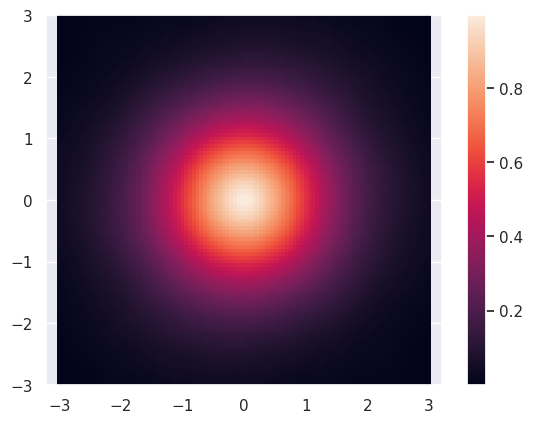

In [64]:
plt.pcolormesh(xx, yy, np.real(f))
plt.colorbar()

lim = lim
plt.axis('equal')
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)

plt.savefig("latex/images/ex_2_ecf.png")


## Ex 3

In [195]:
def gen_ecf(Xs, ts):
    Xs_j = Xs*1j
    Z = [np.mean(np.exp([np.sum(Xs_j*t, 1)]),1) for t in ts]
    return ts, Z

In [206]:
def estym_alpha_from_cf(ts, Z):
    a, b  = np.polyfit(np.log(ts), np.log(-np.log(np.abs(Z))), 1)
    return a, b

def sym_alpha_from_cf(alpha, n, ts):
    Xs = sub_gaussian_SaS(alpha, sigma_matrix=[[1, 0], [0, 1]], n = n)
    ts, Z = gen_ecf(Xs, ts)
    a, b = estym_alpha_from_cf(ts, Z)
    return a, b

In [220]:
def spectral_measure_est(Xs, r, name ):
    mask =  np.sqrt(np.sum(np.power(Xs, 2), 1)) > r
    Xs_mask = Xs[mask]
    fig,ax=plt.subplots(1)
    ax.hist(np.arctan2(Xs_mask[:,0], Xs_mask[:,1]) , xunits = radians, density= True, bins =20)
    plt.xticks(np.arange(-pi, pi+pi/2, step=(pi/2)), ['-π','-π/2','0','π/2','π'])

    fig.tight_layout()
    plt.hlines(1/(2*pi) ,-pi, pi, colors= "red", label="$\\frac{1}{2\\pi}$")
    plt.legend()
    plt.savefig(name)
    plt.show()

In [196]:
X_3  = sub_gaussian_SaS(alpha, sigma_matrix=[[1, 0], [0, 1]], n = 10000)

In [197]:
ts = np.linspace(0.1,2,100)
Z = gen_ecf(X_3, ts)[1]

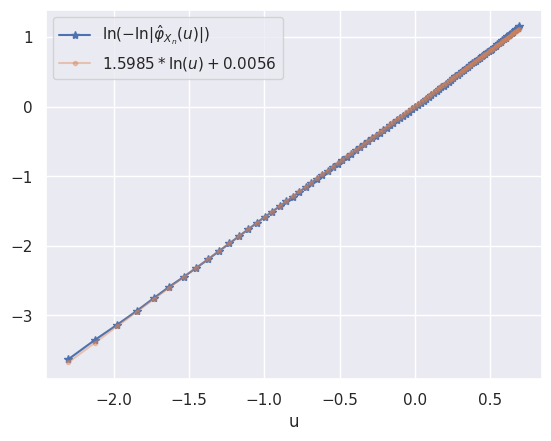

In [200]:
a, b = estym_alpha_from_cf(ts, Z)
plt.plot(np.log(ts), np.log(-np.log(np.abs(Z))), "*-", label = "$\ln(-\\ln |\\hat \\varphi_{X_n}(u)|)$")
plt.plot(np.log(ts), a*np.log(ts) + b,".-", label = "$%.4f*\\ln(u)+%.4f$"%(a,b), alpha = 0.4)
plt.xlabel("u")
plt.legend()
plt.savefig("latex/images/compare_cf.png")
plt.show()

In [212]:
ts = np.linspace(0.1,2,100)
ak_cf = np.array([sym_alpha_from_cf(alpha, n = 10000, ts= ts)[0] for _ in range(1000)])
ak_cf = ak_cf[~np.isnan(ak_cf)]

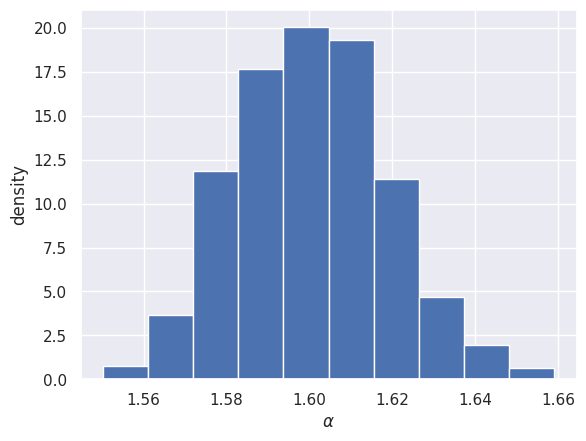

In [213]:
plt.hist(ak_cf, bins = 10, density=True)
plt.xlabel("$\\alpha$")
plt.ylabel("density")
plt.savefig("latex/images/cf_alpha_estimation_hist.png")
plt.show()

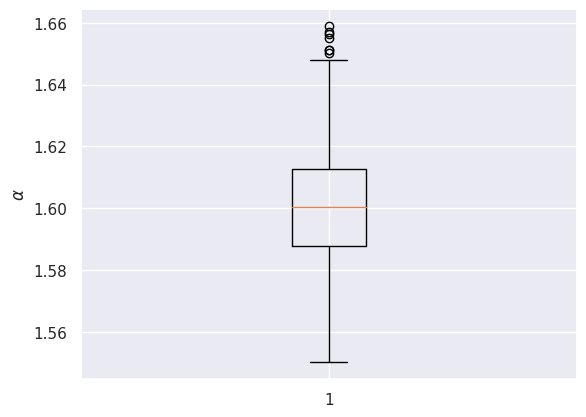

In [214]:
plt.boxplot(ak_cf[~np.isnan(ak_cf)])
plt.ylabel("$\\alpha$")
plt.savefig("latex/images/cf_alpha_estimation_boxplot.png")
plt.show()

In [215]:
print(pd.DataFrame(ak_cf).describe().T.to_latex())

\begin{tabular}{lrrrrrrrr}
\toprule
{} &   count &      mean &       std &       min &       25\% &      50\% &       75\% &       max \\
\midrule
0 &  1000.0 &  1.600623 &  0.018222 &  1.550235 &  1.587636 &  1.60046 &  1.612592 &  1.658989 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_23090/3939636250.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd.DataFrame(ak_cf).describe().T.to_latex())


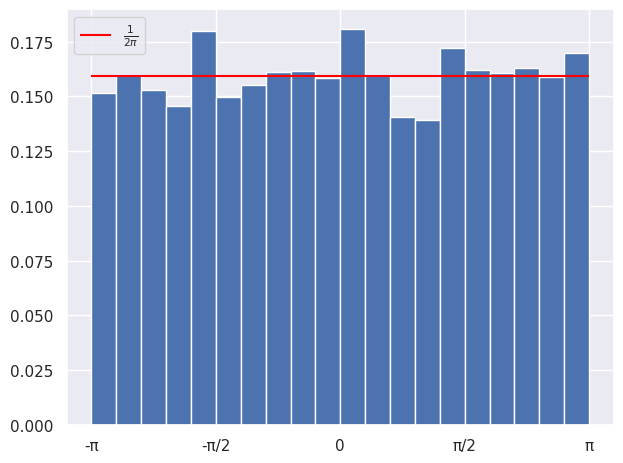

In [221]:
spectral_measure_est(X_3, 1, name = "spectral_measure_estimates.png")

# ex4

In [224]:
alpha = 1.6
X_4  = sub_gaussian_SaS(alpha, sigma_matrix=[[1, 0], [0, 1]], n = 10000)

In [232]:
xn = 100
yn = 100
lim = 2.5
xs = np.linspace(-lim, lim, xn)
ys = np.linspace(-lim, lim, yn)
ts_2d = np.array([ [x,y] for x in xs  for y in ys])
XY, Z = gen_ecf(X_4, ts_2d)
xx,yy = np.meshgrid(xs, ys)
f = np.reshape(Z, (xn, yn)).T

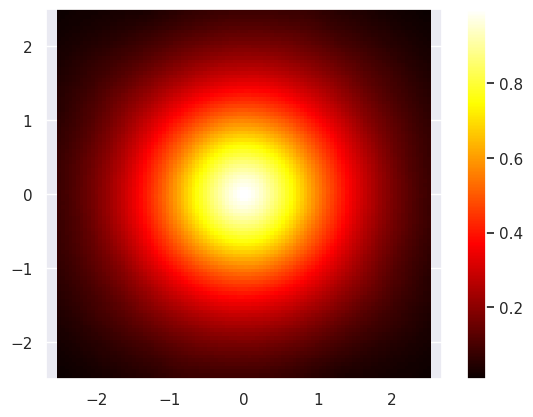

In [235]:
plt.pcolormesh(xx, yy, np.real(f) , cmap='hot')
plt.colorbar()

plt.axis('equal')
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)
plt.savefig("latex/images/ex_5_cf_sub_gaussian_SaS.png")


# x5

In [39]:
def codiffence(X, Y):
    XminusY = X - Y
    EexpX = np.mean(np.exp(1j*X))
    EexpY = np.mean(np.exp(-1j*Y))

    EexpXminusY = np.mean(np.exp(1j*XminusY))
    tau = np.log(EexpXminusY) - np.log(EexpX) - np.log(EexpY)
    return tau


### example 1

In [238]:
alpha = 1.6
arr1 = np.array([
    [1/4, 1,  0],
    [1/4, 0,  1],
    [1/4, -1,  0],
    [1/4, 0, -1],
])

In [241]:
X_5_1 = np.array([multivariate_stable_distributions(alpha, arr1) for _ in range(10000)])

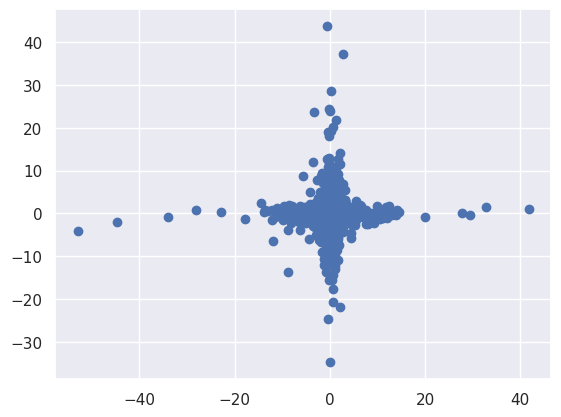

In [242]:
plt.scatter(X_5_1[:, 0], X_5_1[:, 1])
plt.show()

In [244]:
np.cov(X_5_1.T)

array([[3.28096405, 0.04998872],
       [0.04998872, 3.2352661 ]])

In [247]:
codiffence(X_5_1[:, 0], X_5_1[:, 1])

(-0.028442994082080952-0.0018836073855903312j)

### example 2

In [248]:
alpha = 1.6
arr2 = np.array([
    [1/4, np.sqrt(2)/2,  np.sqrt(2)/2],
    [1/4, -np.sqrt(2)/2,  np.sqrt(2)/2],
    [1/4, -np.sqrt(2)/2, -np.sqrt(2)/2],
    [1/4, np.sqrt(2)/2, -np.sqrt(2)/2],
])
X_5_2 = np.array([multivariate_stable_distributions(alpha, arr2)
             for _ in range(100000)])

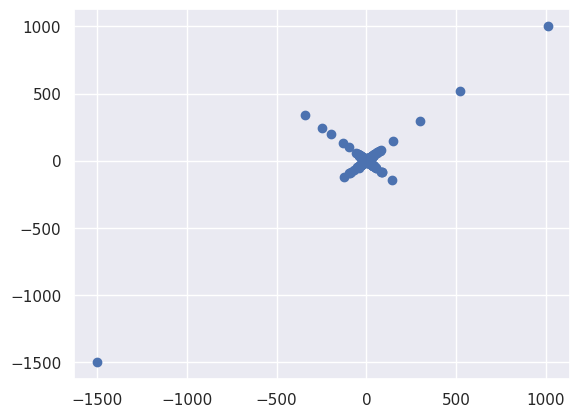

In [249]:
plt.scatter(X_5_2[:, 0], X_5_2[:, 1])
plt.show()

In [251]:
np.cov(X_5_2.T)

array([[44.01419095, 34.25086088],
       [34.25086088, 43.88172709]])

In [252]:
codiffence(X_5_2[:, 0], X_5_2[:, 1])

(0.2772826492024827+0.0034084330081493937j)

### example 3

In [259]:
X_5_3  = sub_gaussian_SaS(alpha, sigma_matrix=[[1, 0.5],[0.5, 1]], n = 100000)

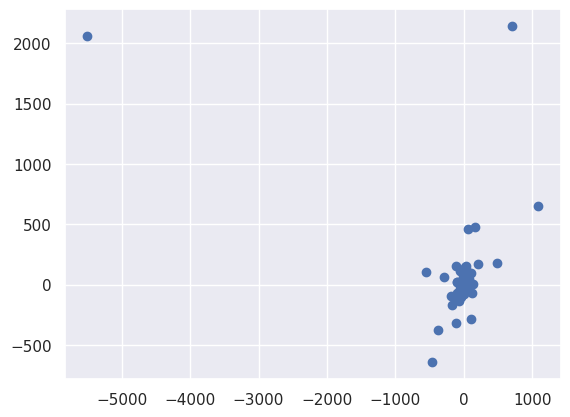

In [260]:
plt.scatter(X_5_3[:, 0], X_5_3[:, 1])
plt.show()

In [261]:
np.cov(X_5_3.T)

array([[335.53065797, -82.95312302],
       [-82.95312302, 111.73329518]])

In [262]:
codiffence(X_5_3[:, 0], X_5_3[:, 1])

(0.5789055871986303+0.0004509672517560184j)

### example 4

In [37]:
X_5_4  = sub_gaussian_SaS(alpha, sigma_matrix=[[1, 0],[0, 1]], n = 100000)

In [40]:
codiffence(X_5_4[:, 0], X_5_4[:, 1])

(0.1538363910125613-0.0030131245178787324j)